<img src="../img/viu_logo.png" width="200">

## 04EPPY - Actividad 1

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 10/03/2022
- Convocatoria 2 - 17/03/2022

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros. 

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que hacer un tag al repositorio en una fecha anterior a la fecha de entrega de la actividad, y pegar el enlace al tag del repositorio en la actividad de blackboard.

In [2]:
import numpy as np
import pandas as pd

### A1 - Ficheros - 15%
- Descarga datos mediante la siguiente url https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv
- Imprimir el número de ciudades que tiene el estado de Florida
- Resolver el problema de dos maneras distintas, una usando pandas y otra sin usar ninguna librería (solo Python standard)

In [85]:
import urllib.request 
import os
import csv


url = "https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv"
file_route = os.path.join("res", "us_cities_states_counties.csv")
#(url, file_route)
urllib.request.urlretrieve(url, file_route)

#Pandas
cities_dataset = pd.read_csv(file_route, sep="|", header=0, engine="python")
florida_cities = set(cities_dataset[cities_dataset["State full"] == "Florida"]["City"])

print(f"El numero de ciudades que tiene el estado de Florida es {len(florida_cities)}")

#Python
with open(file_route) as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter="|")
    
    florida_cities_py = set()
    
    for line in csv_reader:
        if line["State full"] == "Florida":
            florida_cities_py.add(line["City"])
    
    print(f"El numero de ciudades que tiene el estado de Florida es {len(florida_cities_py)}")

El numero de ciudades que tiene el estado de Florida es 537
El numero de ciudades que tiene el estado de Florida es 537


### A2 - 15%
- Genera una matriz con valores aleatorios de 0 a 100 de dimensiones 16x16
- Calcula los siguentes estadísticos en la matriz anterior, por fila (el resultado de cada uno debe ser un array de dimensiones 16x1)
  - Suma de los elementos de cada fila
  - Media de los elementos de cada fila
  - Valores mínimos de cada fila
  - Valores máximos de cada fila

In [58]:
random_matrix = np.zeros((16,16))

for i in  range(0,16):
    for j in range(0,16):
        random_matrix[i,j] = np.random.randint(0,101)
        
sum_of_rows = random_matrix.sum(axis=1).reshape(16,1)
print(sum_of_rows)
mean_of_rows = random_matrix.mean(axis=1, dtype="int64").reshape(16,1)
print(mean_of_rows)
min_of_rows = random_matrix.min(axis=1).reshape(16,1)
print(min_of_rows)
max_of_rows = random_matrix.max(axis=1).reshape(16,1)
print(max_of_rows)

[[960.]
 [637.]
 [774.]
 [741.]
 [961.]
 [976.]
 [892.]
 [929.]
 [730.]
 [625.]
 [808.]
 [863.]
 [801.]
 [902.]
 [741.]
 [731.]]
[[60]
 [39]
 [48]
 [46]
 [60]
 [61]
 [55]
 [58]
 [45]
 [39]
 [50]
 [53]
 [50]
 [56]
 [46]
 [45]]
[[ 6.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 4.]
 [ 5.]
 [13.]
 [14.]
 [ 3.]
 [ 0.]
 [ 3.]
 [ 1.]
 [ 0.]
 [ 8.]
 [ 7.]
 [ 2.]]
[[ 98.]
 [ 97.]
 [ 97.]
 [ 97.]
 [100.]
 [ 98.]
 [ 88.]
 [ 99.]
 [ 92.]
 [ 93.]
 [100.]
 [ 99.]
 [ 98.]
 [ 97.]
 [ 98.]
 [ 96.]]


### A3 - 10%
- Explica y expón, con un ejemplo propio, el broadcasting de NumPy

### A4 - 10%
- Resolución de dos sistemas de ecuaciones
    - $ A : \begin{cases} -9y +  4x = 20 \\ -7y + 16x = 80                         \end{cases}$
    
    - $ B : \begin{cases} x - 2y + 3z = 7 \\ 2x + y + z = 4 \\ -3x + 2y -2z = -10 \end{cases}$

In [9]:
import numpy.linalg as linalg

#Sistema de ecuaciones A

a = np.array([[-9, 4],[-7,16]])
b = np.array([20,80])

y, x = linalg.solve(a,b)

print(f"Para el sistema de ecuaciones A, el valor de X es {int(x)} y el valor de Y es {int(y)}")

#sistema de ecuaciones B

c = np.array([[1,-2,3],[2,1,1],[-3,2,-2]])
d = np.array([7,4,-10])

x, y, z = linalg.solve(c,d)

print(f"Para el sistema de ecuaciones B, el valor de X es {int(x)}, el valor de Y es {int(y)} y el valor de Z es {int(z)}")

Para el sistema de ecuaciones A, el valor de X es 5 y el valor de Y es 0
Para el sistema de ecuaciones B, el valor de X es 2, el valor de Y es 0 y el valor de Z es 1


### A5 - 15%
- Crear un DataFrame de dimensiones 10x10, con números aleatorios en el rango `[0,20]`
- Reemplazar todos aquellos elementos menores de 5 por NaN
- Averiguar cuantos elementos tienen Nan por fila

In [3]:
number_array = np.random.randint(low = 0, high = 21, size=(10,10))

number_dataset = pd.DataFrame(number_array, columns = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"])

mask = number_dataset < 5
number_dataset[mask] = np.nan

display(number_dataset)

number_of_nan_per_row = dict(number_dataset.isna().sum(axis=1))

for key in number_of_nan_per_row:
    print(f"La fila {key} tiene {number_of_nan_per_row[key]} NaN")

,A,B,C,D,E,F,G,H,I,J
0,NaN,NaN,18.0,18.0,NaN,NaN,NaN,9.0,NaN,15
1,16.0,20.0,10.0,14.0,NaN,12.0,18.0,NaN,10.0,8
2,NaN,20.0,20.0,15.0,9.0,NaN,NaN,NaN,7.0,19
3,7.0,8.0,8.0,NaN,NaN,14.0,5.0,NaN,17.0,16
4,NaN,12.0,20.0,5.0,8.0,11.0,17.0,NaN,17.0,17
5,9.0,6.0,18.0,12.0,19.0,5.0,13.0,7.0,17.0,20
6,11.0,17.0,NaN,NaN,15.0,19.0,NaN,19.0,13.0,8
7,NaN,17.0,12.0,17.0,20.0,7.0,14.0,5.0,18.0,14
8,6.0,15.0,9.0,8.0,NaN,5.0,10.0,17.0,18.0,10
9,20.0,NaN,11.0,11.0,12.0,17.0,12.0,14.0,NaN,10


La fila 0 tiene 6 NaN
La fila 1 tiene 2 NaN
La fila 2 tiene 4 NaN
La fila 3 tiene 3 NaN
La fila 4 tiene 2 NaN
La fila 5 tiene 0 NaN
La fila 6 tiene 3 NaN
La fila 7 tiene 1 NaN
La fila 8 tiene 1 NaN
La fila 9 tiene 2 NaN


### A6 - 20%
- Se tienen tres datasets, se adjuntan sus datos como diccionarios
  - Students, representa un conjunto de alumnos, con sus nombres, edad y sexo
  - Subjects, un conjunto de asignaturas, con su nombre y el semestre en que se imparten
  - Marks, un conjunto de notas que han obtenido los alumnos en las asignaturas
- Obtener la siguiente información usando Pandas
  - El nombre del alumno con la mejor nota, y en que asignatura ha sido
  - Cuantos alumnos tienen asignaturas suspendidas en el primer semestre
  - La media de edad de los asistentes a la asignatura de Python
  - Formar una palabra con las iniciales de los nombres de los estudiantes ordenados por edad
- Representar graficamente
  - Las notas medias de todos los estudiantes por asignatura, agrupando por sexo
  - La densidad bivariable de la edad de los estudiantes frente a sus notas, agrupando por sexo (mostrando los datos de dispersion en la zona central, las curvas de densidad en los ejes)

In [8]:
students = {'StudentId': [1,2,3,4,5,6], 'Name' : ['Yael','Thomas','Paula','Orlando','Hannah','Nicole'], 'Age' : [22,31,19,44,39,51], 'Sex' : ['M', 'M', 'F', 'M', 'F', 'F']}
subjects = {'SubjectId': [1,2,3], 'Name': ['Python', 'Math', 'DeepLearning'], 'Semester': [1, 1, 2]}
marks = {'StudentId' : [2,2,1,3,6,4,4,3,2,5], 'SubjectId' : [1,3,1,2,1,2,3,1,2,1], 'Mark': [6,5,8,3,5,2,7,2,4,6]}

In [9]:
#Crear un DataFrame para cada diccionario

students_df = pd.DataFrame(students)
subjects_df = pd.DataFrame(subjects)
marks_df = pd.DataFrame(marks)
#display(students_df, subjects_df, marks_df)


#Unir los DataFrame en uno con toda la informacion, uniendolos en sus columnas en comun

students_with_marks = pd.merge(students_df, marks_df, on="StudentId", how="inner")
students_with_marks = pd.merge(students_with_marks, subjects_df, on="SubjectId", how="right")
display(students_with_marks)


#El nombre del alumno con la mejor nota, y en que asignatura ha sido

best_mark = students_with_marks["Mark"].idxmax()
name = students_with_marks.loc[best_mark]["Name_x"]
subject = students_with_marks.loc[best_mark]["Name_y"]

print(f"El nombre del alumno con la mejor nota es {name} en la asignatura {subject} \n")


#Cuantos alumnos tienen asignaturas suspendidas en el primer semestre

failed_students_1st_semester = set(students_with_marks[(students_with_marks["Mark"] < 5) & students_with_marks["Semester"] == 1]["Name_x"])
print(f"{len(failed_students_1st_semester)} alumnos tienen asignaturas suspendidas en el primer semestre \n")


#La media de edad de los asistentes a la asignatura de Python

student_age_mean = int(students_with_marks[students_with_marks["Name_y"] == "Python"]["Age"].mean())
print(f"La media de edad de los asistentes de la asignatura de Python es {student_age_mean} \n")


#Formar una palabra con las iniciales de los nombres de los estudiantes ordenados por edad

#display(students_with_marks.sort_values(by = "Age"))
initial_student_name = list(students_with_marks.sort_values(by = "Age")["Name_x"].str[0].drop_duplicates())

word_initials = ''

for i in initial_student_name:
    word_initials += f'{i}'
    
print(word_initials, "\n")



,StudentId,Name_x,Age,Sex,SubjectId,Mark,Name_y,Semester
0,1,Yael,22,M,1,8,Python,1
1,2,Thomas,31,M,1,6,Python,1
2,3,Paula,19,F,1,2,Python,1
3,5,Hannah,39,F,1,6,Python,1
4,6,Nicole,51,F,1,5,Python,1
5,2,Thomas,31,M,2,4,Math,1
6,3,Paula,19,F,2,3,Math,1
7,4,Orlando,44,M,2,2,Math,1
8,2,Thomas,31,M,3,5,DeepLearning,2
9,4,Orlando,44,M,3,7,DeepLearning,2


El nombre del alumno con la mejor nota es Yael en la asignatura Python 

3 alumnos tienen asignaturas suspendidas en el primer semestre 

La media de edad de los asistentes de la asignatura de Python es 32 

PYTHON 



Mark     
Sex                  F    M
Name_y                     
DeepLearning       NaN  6.0
Math          3.000000  3.0
Python        4.333333  7.0

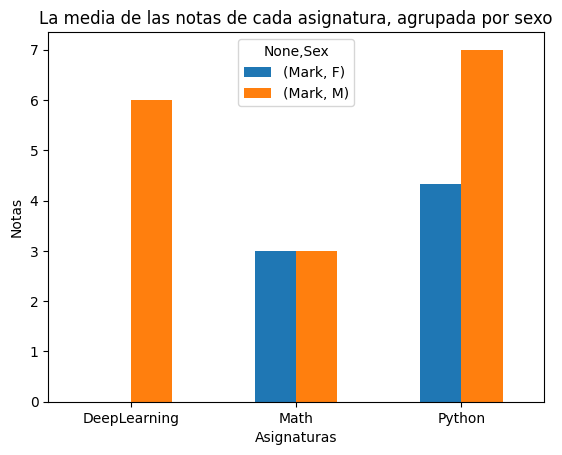

In [108]:
#Las notas medias de todos los estudiantes por asignatura, agrupando por sexo
import matplotlib.pyplot as plt


data = students_with_marks[["Name_y","Sex","Mark"]].groupby(["Name_y", "Sex"]).mean().unstack("Sex")
display(data)

data.plot.bar(ylabel ="Notas", xlabel = "Asignaturas", rot=0, title= "La media de las notas de cada asignatura, agrupada por sexo")
plt.show()

### A7 - 15%
- Dadas dos Series de Pandas, implementar una función 'find_not_common' para encontrar los elementos no comunes a ambas Series
- Se proveen dos series como referencia, el resultado para este ejemplo debe ser una serie con los elementos [4, 6, 14, 16]

In [4]:
def find_not_common(ser1, ser2):
    #Se unen las dos series en una con el metodo "union1d"
    union = pd.Series(np.union1d(ser1,ser2))
    #Se buscan los valores comunes con el metodo "intersect1d" y se guardan en una nueva series
    intersect = pd.Series(np.intersect1d(ser1, ser2))
    #Los elementos no comunes seran los elementos de la union que no se encuentren en la serie "intersect"
    return pd.Series(union[~union.isin(intersect)].values)

p1 = pd.Series([2, 4, 12, 6, 8, 10])
p2 = pd.Series([8, 10, 12, 10, 14, 2, 16, 10])

print(find_not_common(p1, p2).equals(pd.Series([4, 6, 14, 16]))) # Esto deberia imprimir True

True
